# QuickSort

Another Divide and Conquer algorithim similar to MergeSort. In practise QuickSort and MergeSort are the most commonly used, but for interviews just used .sort() lol

## Implementation

The idea behind quicksort is to pick an index, which is called the pivot. We then partition the array such that every value to the left is less than or equal to the pivot and every value to the right is greater than the pivot, that means here the pivot is in the appropriate place!

## Picking the pivot
- Pick the first index
- Pick the last index
- Pick the median (pick the first, last and the middle value and find their median and perform the split at the median)
- Pick a random pivot

for this tutorial, we will just use the last elem

## Recursive partition

1. Once we pick a pivot we will partition the array such that all elements less than or equal to the pivot are on the left and the rest are on the right.
2. We will then recursively run quicksort on the left and right halves until we hit the base case which is an array of size 1.

Unlike MergeSort, no need to merge the 2 halves. QuickSort kinda like the opposite of MergeSort - MergeSort has simple recursion/complex merging, QuickSort has complex recursion/no mergining.

> Another variant is randomized Quicksort, where the pivot is picked randomly and reduce chance of hitting worst case which is $O(n^2)$, and gives $O(nlog(n))$

## Performing a partition

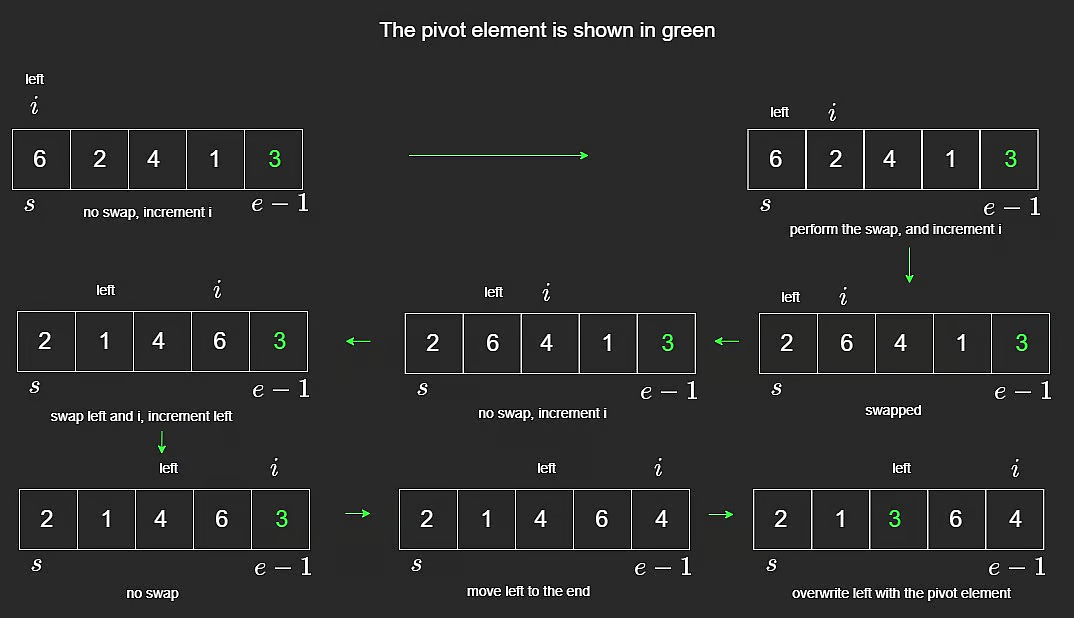

1. Pick the `pivot` (here we use last element)
2. Have a slow pointer `left` and a fast pointer `i` starting at the `0` elem of this subarray
3. In each iteration, 
    - If the the `arr[i]` is *smaller* than `arr[pivot]`, then swap `arr[left]` and `arr[i]`
      - Increment `left` by 1
    - Regardless of whether swapping occurs, we increment the fast pointer `i` by 1
   - Terminate this iteration loop when `i` actually hits the pivot
4. Swap the pivot with `arr[left]`
5. Call this again on left and right partition

> notice that we are not allocating any new memory for these partitions. We are just moving around pointers to work on a smaller part of the original array each time

```python
# Implementation of QuickSort
def quickSort(arr: list[int], s: int, e: int) -> list[int]:
    #base case to check if the length of subarray is 1
    if e - s + 1 <= 1:
        return arr

    #assign the pivot to the last elem of this subarray
    pivot = arr[e]
    #assign the left (slow) pointer to the start elem of this subarray
    #this left will increment anytime swapping happens
    left = s # pointer for left side

    # Partition: elements smaller than pivot on left side
    #index will start on the first elem, and end on the elem right before arr[e], basically right before pivot
    for i in range(s, e):
        #if arr[i] is strictly smaller than pivot value
        if arr[i] < pivot:
            #swap arr[left] and arr[i]
            tmp = arr[left]
            arr[left] = arr[i]
            arr[i] = tmp
            #increment left
            left += 1

    # Move pivot to where left pointer is at
    # we do this by swapping pivot elem with the arr[left]
    #note that everything after arr[left] is BIGGER than pivot elem, and everything before&inclusive of arr[left] is smaller/equal to pivot value
    arr[e] = arr[left]
    arr[left] = pivot
    
    # Quick sort left side (excluding pivot)
    quickSort(arr, s, left - 1)

    # Quick sort right side (excluding pivot)
    quickSort(arr, left + 1, e)

    return arr
```

---
## Time and Space Complexity

The partition step takes $O(n)$ time and we do this for every level of the recursion tree. 

The number of levels in the recursion tree is $O(log n)$, but only in the best case. The best case occurs when each partition is roughly equal. If each partition is in the middle everytime, then we'll get overall $O(nlog(n))$

Continuously picking the pivot (like always smallest or largest element) will result in worst case performance of $O(n^2)$. This will make the height of the recursion tree $n$ as we end up with 2 partitions of size `n-1` and `1` respectively

## Stability

In general QuickSort is not stable as it exchanges non-adjacent elements
